In [1]:
 !pip install "tensorflow>=2.0.0"
 import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 421.8MB 35kB/s 
     |████████████████████████████████| 450kB 46.1MB/s 
     |████████████████████████████████| 3.9MB 38.5MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0
2.1.0


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-03-08 13:49:58--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.2’

moore.csv.2         100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-03-08 13:49:59 (43.3 MB/s) - ‘moore.csv.2’ saved [2302/2302]



In [0]:
data = pd.read_csv('moore.csv.2', header=None).values
X = data[:,0].reshape(-1,1)
Y = data[:,1]

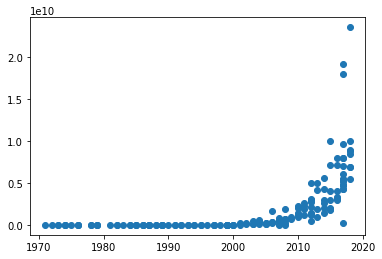

In [22]:
plt.scatter(X,Y)

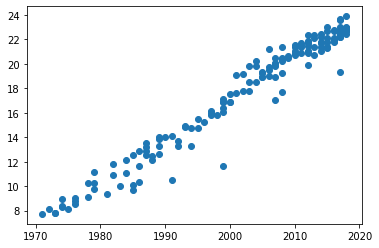

In [23]:
Y = np.log(Y)
plt.scatter(X,Y)

In [0]:
X= X - X.mean()

In [26]:
model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(1,)), tf.keras.layers.Dense(1)])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0,9), loss='mse')

def schedule(epochs,lr):
  if epochs>=50:
     return 0.0001
  else:
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

#Train the model
r = model.fit(X,Y,epochs=200, callbacks=[scheduler])




Train on 162 samples
Epoch 1/200
162/162 [==============================] - 0s 1ms/sample - loss: 330.6539
Epoch 2/200
162/162 [==============================] - 0s 72us/sample - loss: 312.1881
Epoch 3/200
162/162 [==============================] - 0s 71us/sample - loss: 308.0336
Epoch 4/200
162/162 [==============================] - 0s 63us/sample - loss: 305.2577
Epoch 5/200
162/162 [==============================] - 0s 63us/sample - loss: 306.5152
Epoch 6/200
162/162 [==============================] - 0s 63us/sample - loss: 288.0272
Epoch 7/200
162/162 [==============================] - 0s 62us/sample - loss: 275.9039
Epoch 8/200
162/162 [==============================] - 0s 79us/sample - loss: 274.8262
Epoch 9/200
162/162 [==============================] - 0s 68us/sample - loss: 289.8163
Epoch 10/200
162/162 [==============================] - 0s 67us/sample - loss: 258.6989
Epoch 11/200
162/162 [==============================] - 0s 63us/sample - loss: 252.9185
Epoch 12/200
162/162 

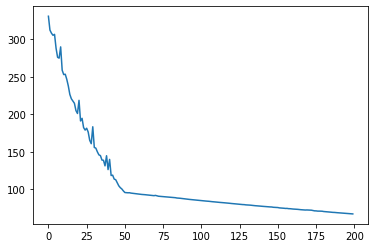

In [27]:
plt.plot(r.history['loss'], label='loss')

In [28]:
#Get the slope of the line
print(model.layers) #Input layers is not counted
print(model.layers[0].get_weights())


[array([[0.36448124]], dtype=float32), array([9.632215], dtype=float32)]


In [0]:
#The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]

In [30]:
a

0.36448124